In [247]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score

In [248]:
dataframe= pd.read_csv(r'../../datasets/iris.csv')

In [249]:
actual_labels = dataframe['species']

encoder = LabelEncoder()
actual_labels = encoder.fit_transform(actual_labels)

In [250]:
dataframe.drop('species',axis=1,inplace=True)

In [251]:
dataframe

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [252]:
clusterer = KMeans(n_clusters=3,init='random',n_init =10,max_iter=100,tol=1e-4,random_state=32)

In [253]:
scaler = StandardScaler()
x_encoded = scaler.fit_transform(dataframe)

In [254]:
clusterer.fit(x_encoded)
predicted_labels = clusterer.predict(x_encoded)

In [255]:
centroids = clusterer.cluster_centers_
centroids

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

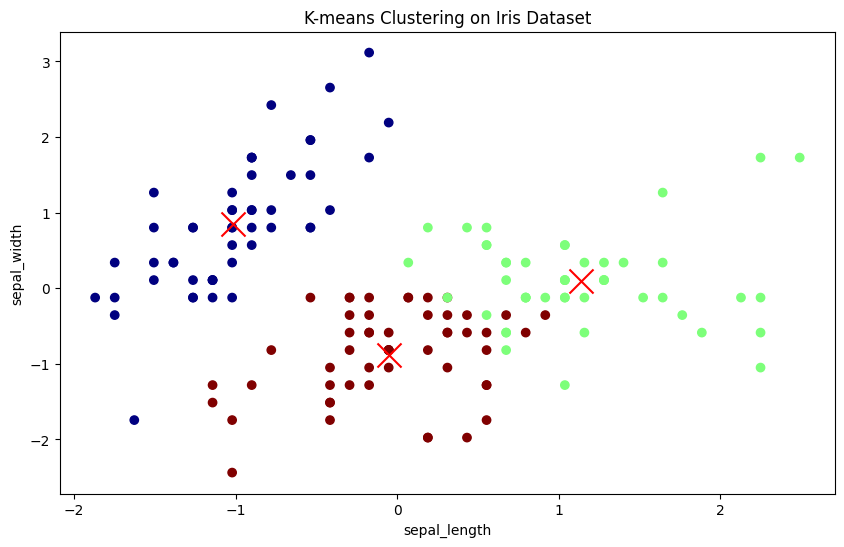

In [256]:
plt.figure(figsize=(10,6))
plt.scatter(x_encoded[:,0],x_encoded[:,1],c=predicted_labels,cmap='jet',marker='o')
plt.scatter(centroids[:,0],centroids[:,1],c='red',s=300,marker='x')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('K-means Clustering on Iris Dataset')
plt.show()